# Challenge - Scraper Chuck Norris

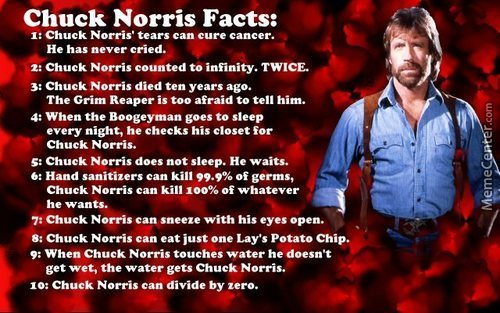

Avant de te lancer dans ton projet de robot-chasseur-d'annonces-pour-juniors, ton objectif pour cette quête sera de scraper des Chuck Norris facts à partir de cette adresse : Chuck Norris facts.

1. Lance une requête sur la page web indiquée ci-dessus.
2. Quel est le response code ? A quoi correspond cette erreur ? Chuck t'a grillé !
3. Contourne la protection en indiquant un navigateur existant. Et relance ta requête.
4. Trouve la balise permettant d'identifier le bloc contenant une blague. Combien y en a-t-il ? (il devrait y en avoir 20). Affiche le 8e bloc de blague grâce à l'attribut .text.
5. Chacun des éléments de ton itérable est lui-même une mini-soupe. Utilise la méthode .find avec la balise appropriée pour isoler uniquement la 8e blague, sans les autres éléments (donc sans la note, etc...)
6. Fais de même pour isoler uniquement la note de la 8e blague
7. Crée un dictionnaire vide, puis crée une boucle qui viendra enregistrer dans ce dictionnaire chaque blague en clé et chaque note correspondante en valeur.
8. Transforme ce dictionnaire en DataFrame de 2 colonnes : blague et note. Il doit avoir 20 lignes : une par blague.
9. Partage le lien vers ton notebook en guise de solution au challenge.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
url = "https://chucknorrisfacts.net/facts.php?page=1"

In [3]:
html = requests.get(url)
# response 406, refus d'accès
html

<Response [406]>

In [4]:
# récupérer les informations du code source html de la page web si response 200
soup = BeautifulSoup(html.text, 'html.parser')

In [5]:
# si != resp 200 contourner l'accès
navigator = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1)'
html = requests.get(url, headers={'User-Agent': navigator})
html

<Response [200]>

In [6]:
# récupérer les informations du code source html de la page web
soup = BeautifulSoup(html.text, 'html.parser')
#print(soup.prettify())

In [7]:
# class list set
class_list = set()
  
# Page content from Website URL
page = requests.get(url)
  
# get all tags
tags = {tag.name for tag in soup.find_all()}
  
# iterate all tags
for tag in tags:  
    # find all element of tag
    for i in soup.find_all( tag ):  
        # if tag has attribute of class
        if i.has_attr( "class" ):  
            if len( i['class'] ) != 0:
                class_list.add(" ".join( i['class']))

print("Classes de la page web :")  
print(class_list)

Classes de la page web :
{'five-stars', 'two-stars', 'votebox', 'rated_text', 'adsbygoogle', 'out5Class', 'votesClass', 'one-star', 'three-stars', 'four-stars', 'current-rating', 'star-rating'}


# Scraping Chuck - Solution 1

In [8]:
# scrap blagues

facts = soup.find_all("div", style="border-top: 1px solid #251836; padding: 0 0 5px 7px;")
print(len(facts))

# scrap notes du text sous balise <div> --> <span>
notation = soup.find_all('span', {'class':'out5Class'})
print(len(notation))

# résultats sous dic et sélection du text uniquement, sélection blague n°2 car pas de note
dic = {facts[x].text.strip("</p>")[1:] : notation[x].text for x in range(20)}

# result sous df
result_df = pd.DataFrame.from_dict(dic, orient=("index")).reset_index().rename(columns={"index":"Joke", 0:"Note"})
result_df

20
20


,Joke,Note
0,There is no 'ctrl' button on Chuck Norris' com...,3.74
1,Chuck Norris doesnt sleep. He waits.Rated 3.82...,3.82
2,Some kids piss their name in the snow. Chuck N...,4.05
3,Chuck Norris' calendar goes straight from Marc...,4.08
4,Chuck Norris is the only person in the world t...,3.56
5,Chuck Norris' tears cure cancer. Too bad he ha...,4.04
6,When Chuck Norris is put in a straight jacket ...,3.37
7,"Jesus can walk on water, but Chuck Norris can ...",4.04
8,Chuck Norris once shot an enemy plane down wit...,3.93
9,Chuck Norris doesn't read books. He stares the...,3.83


# Scraping Chuck : Solution 2

In [9]:
# scrap blagues sous balises <p>
facts = soup.find_all("p")

jokes = []

for joke in facts:
    texte = joke.text
    check_href = texte.find('Fact') or texte.find('https://chucknorrisfacts.net/sitemap.xml') or texte.find('Copyright')
    if check_href > 0:
        pass
    else:
        jokes.append(texte)
# la première joke n'est pas notée
del jokes[0]

# check nombre de blagues
print(len(jokes))

20


In [10]:
# scrap blagues code optimisé

# liste blagues, retirer les liens href et copyrights du resultat, la première joke n'est pas notée
jokes = [joke.text for joke in facts][7:-1]

# check nombre de blagues
print(len(jokes))

20


In [11]:
# check result
for element in jokes:
    print(element)

There is no 'ctrl' button on Chuck Norris' computer. Chuck Norris is always in control.
Chuck Norris doesnt sleep. He waits.
Some kids piss their name in the snow. Chuck Norris can piss his name into concrete.
Chuck Norris' calendar goes straight from March 31st to April 2nd. No one fools Chuck Norris. 
Chuck Norris is the only person in the world that can actually email a roundhouse kick.
Chuck Norris' tears cure cancer. Too bad he has never cried.
When Chuck Norris is put in a straight jacket to be contained, he doesn't go insane, the jacket does. NOBODY tries to contain Chuck Norris.
Jesus can walk on water, but Chuck Norris can swim through dry land.
Chuck Norris once shot an enemy plane down with his finger by yelling, "Bang!"
Chuck Norris doesn't read books. He stares them down until he gets the information he wants.
The quickest way to a man's heart is with Chuck Norris' fist.
If you spell Chuck Norris in Scrabble, you win. Forever.
The following is a short list of things Chuck 

In [12]:
# scrap notes

# récup notes du texte sous balise <div>
notation = soup.find_all('span', {'class':'out5Class'})

# résultats sous liste
notes = [note.text for note in notation]
print(len(notes))

20


In [13]:
# afficher le 8ème élément de chaque résult
print(jokes[7])
print(notes[7])

Jesus can walk on water, but Chuck Norris can swim through dry land.
4.04


In [15]:
# df final

# df résultats blagues et notes
result_df = pd.DataFrame(zip(jokes, notes), columns=["Joke", "Note"])
result_df.head(8)

,Joke,Note
0,There is no 'ctrl' button on Chuck Norris' com...,3.74
1,Chuck Norris doesnt sleep. He waits.,3.82
2,Some kids piss their name in the snow. Chuck N...,4.05
3,Chuck Norris' calendar goes straight from Marc...,4.08
4,Chuck Norris is the only person in the world t...,3.56
5,Chuck Norris' tears cure cancer. Too bad he ha...,4.04
6,When Chuck Norris is put in a straight jacket ...,3.37
7,"Jesus can walk on water, but Chuck Norris can ...",4.04
